In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(data= diabetes.data, columns = diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
import pickle
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Model Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# Save the Linear Regression model as a pickle file
pickle_file_path = "Best_Model_Linear_Regression.pkl"
with open(pickle_file_path, 'wb') as file:
    pickle.dump(linear_model, file)

print(f"Best model (Linear Regression) saved to {pickle_file_path}.")


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor()
}


Model Evaluation Metrics:
MSE: 2900.19
MAE: 42.79
R2 Score: 0.45
Best model (Linear Regression) saved to Best_Model_Linear_Regression.pkl.


In [5]:
results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', "R2_Score"])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    
    # pickle_filename = f"{model_name.replace(' ', '_')}.pkl"
    # with open(pickle_filename, 'wb') as file:
    #     pickle.dump(model, file)
    # print(f"{model_name} saved to {pickle_filename}.")


    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'MSE' : [mse],
        'MAE': [mae],
        'R2_Score' : [r2]
    })],ignore_index=True)

print(results)

NameError: name 'models' is not defined

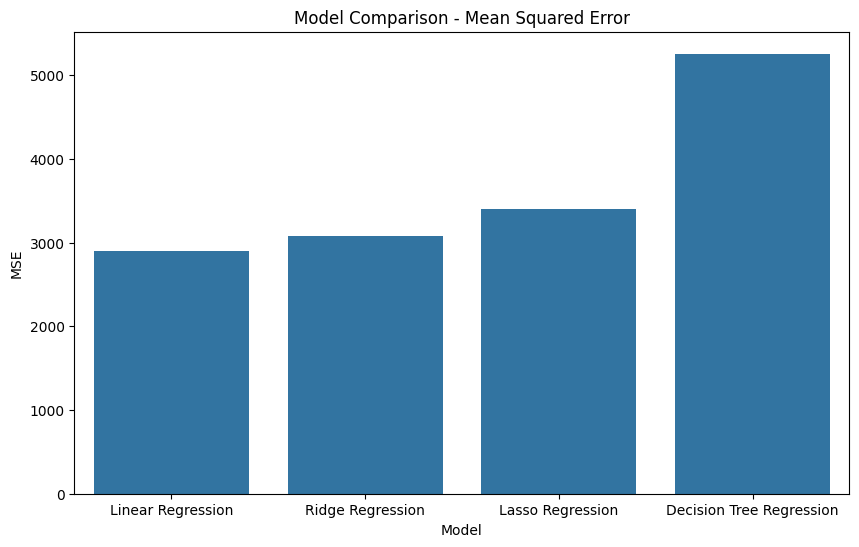

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='MSE', data=results)
plt.title("Model Comparison - Mean Squared Error")
plt.show()

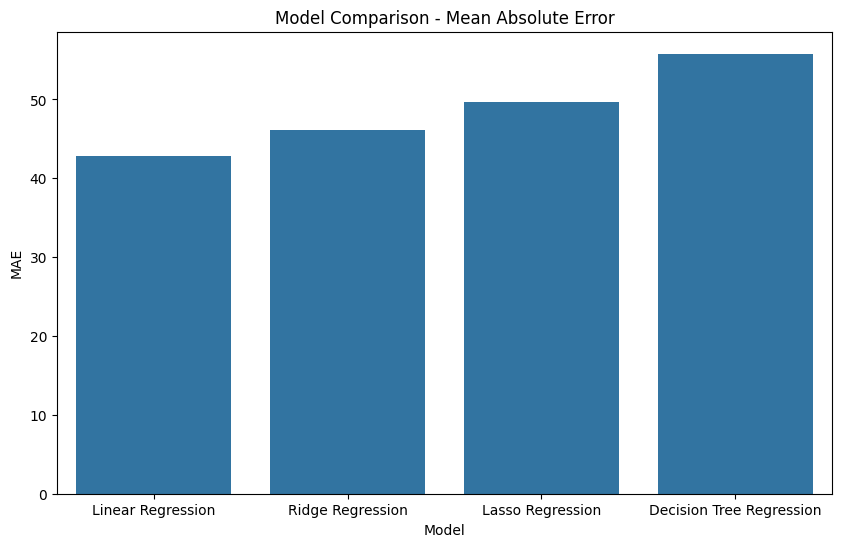

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='MAE', data = results)
plt.title('Model Comparison - Mean Absolute Error')
plt.show()

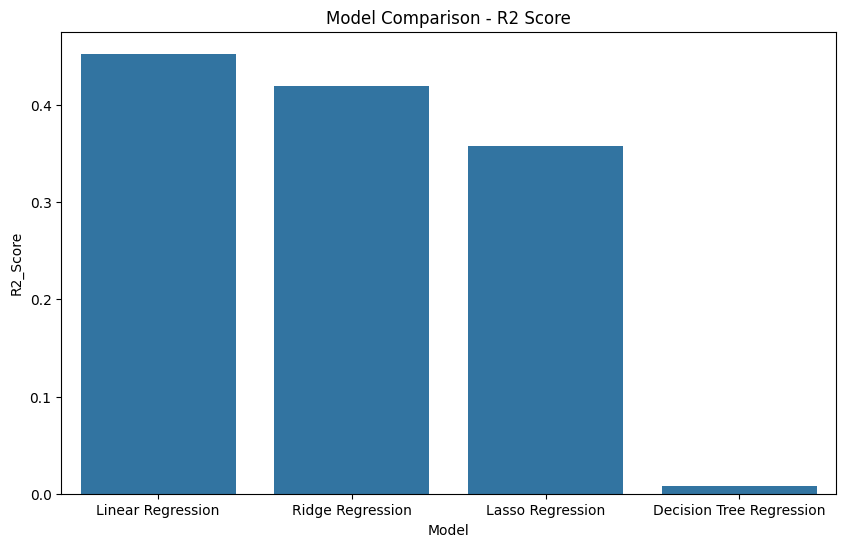

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y = 'R2_Score', data=results)
plt.title("Model Comparison - R2 Score")
plt.show()

In [18]:
import pickle
import numpy as np

def infer_from_model(pickle_file_path, input_data):
    """
    Load a trained model from a pickle file and perform inference on new data.

    Args:
        pickle_file_path (str): Path to the pickle file containing the trained model.
        input_data (list or numpy.ndarray): New input data for prediction. 
                                            Should match the feature dimensions of the model.

    Returns:
        list: Predicted values for the input data.
    """
    # Load the model from the pickle file
    try:
        with open(pickle_file_path, 'rb') as file:
            model = pickle.load(file)
    except FileNotFoundError:
        print(f"Error: The file {pickle_file_path} does not exist.")
        return None

    # Ensure input_data is in the correct format (2D array)
    input_data = np.array(input_data)
    if len(input_data.shape) == 1:
        input_data = input_data.reshape(1, -1)

    # Perform prediction
    try:
        predictions = model.predict(input_data)
        return predictions
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None


In [19]:
# Example new data
new_data = [[0.03, 0.05, 0.06, 0.08, 0.04, 0.07, 0.09, 0.03, 0.02, 0.01]]

# Path to the pickle file for the chosen model (e.g., Linear Regression)
pickle_file_path = "Linear_Regression.pkl"  # Replace with your desired model's pickle file

# Perform inference
predictions = infer_from_model(pickle_file_path, new_data)

if predictions is not None:
    print(f"Predictions for the new data: {predictions}")


Predictions for the new data: [237.92936491]
